<a href="https://colab.research.google.com/github/RaghavMaskara21/Machine-Learning/blob/main/4b_Bias_vs_Variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [4]:
dataset = pd.read_csv('income.data.csv')
dataset.head()

,Unnamed: 0,income,happiness
0,1,3.862647,2.314489
1,2,4.979381,3.433490
2,3,4.923957,4.599373
3,4,3.214372,2.791114
4,5,7.196409,5.596398


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  498 non-null    int64  
 1   income      498 non-null    float64
 2   happiness   498 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [6]:
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
print(len(X_train))
print(len(y_train))

398
398


In [7]:
mse_tr = []
for i in range(1,11):
    poly = PolynomialFeatures(degree = i)
    X_poly = poly.fit_transform(X_train)
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, y_train)
    mse_tr.append(mean_squared_error(y_train, pol_reg.predict(poly.fit_transform(X_train))))
mse_tr

[0.5429679906564793,
 0.5417488233270134,
 0.5357113832203662,
 0.5336686279393811,
 0.5239357975913611,
 0.5192462262388844,
 0.5339622490022402,
 0.6334932665170353,
 0.7912945711681523,
 0.9285211510891828]

In [8]:
mse_tst = []
for i in range(1,11):
    poly = PolynomialFeatures(degree = i)
    X_poly = poly.fit_transform(X_train)
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, y_train)
    mse_tst.append(mean_squared_error(y_test, pol_reg.predict(poly.transform(X_test))))
mse_tst

[0.3974205899004894,
 0.3975702529708054,
 0.40528635913522054,
 0.4001686316106575,
 0.4067988913166294,
 0.42122465044418234,
 0.45487205112107904,
 0.5048727630410234,
 0.6889910629702838,
 0.8587350515592175]

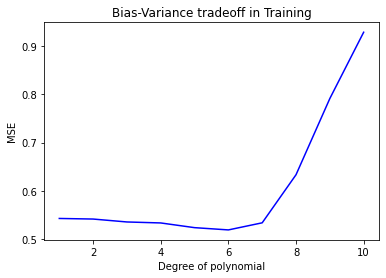

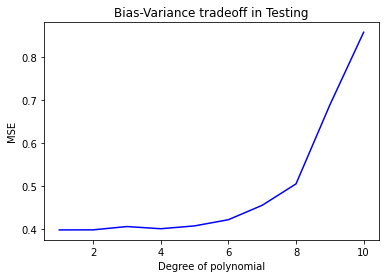

In [9]:
plt.plot(np.array([1,2,3,4,5,6,7,8,9,10]), np.array(mse_tr), color='blue')
plt.xlabel("Degree of polynomial")
plt.ylabel("MSE")
plt.title("Bias-Variance tradeoff in Training")
plt.show()

plt.plot(np.array([1,2,3,4,5,6,7,8,9,10]), np.array(mse_tst), color='blue')
plt.xlabel("Degree of polynomial")
plt.ylabel("MSE")
plt.title("Bias-Variance tradeoff in Testing")
plt.show()